In [ ]:
import pandas as pd

# Load dataset
df = pd.read_excel('/content/AIR_QUALITY_DATASET.xlsx')

# Drop unnecessary columns if they contain too many missing values or are unnamed
df.drop(columns=["Unnamed: 0", "Unnamed: 7"], inplace=True, errors='ignore')

# Convert numeric columns stored as objects to proper numerical types
numeric_cols = ["SO2", "NO2", "CO", "PM2.5", "PM10", "AQI Index"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert, replacing errors with NaN

# Handle missing values (drop rows or fill with median/mean where applicable)
df.fillna(df.median(), inplace=True)

# Remove unwanted characters from categorical columns
df["AQI Index"] = df["AQI Index"].astype(str).str.replace("\\n", " ")

# Reset index
df.reset_index(drop=True, inplace=True)

# Save cleaned dataset
df.to_excel("/content/CLEANED_AIR_QUALITY_DATASET.xlsx", index=False)

print("Dataset cleaned and saved as /content/CLEANED_AIR_QUALITY_DATASET.xlsx")

Dataset cleaned and saved as /content/CLEANED_AIR_QUALITY_DATASET.xlsx


In [ ]:
df.drop_duplicates(inplace=True)


In [ ]:
df.to_excel("/content/CLEANED_AIR_QUALITY_DATASET.xlsx", index=False)
print("Duplicates removed and dataset saved.")


Duplicates removed and dataset saved.


In [ ]:
print(df.isnull().sum())  # Should be close to zero if properly cleaned


SO2              0
NO2              0
CO               0
PM2.5            0
PM10             0
AQI Index        0
temperature_c    0
humidity_pct     0
rainfall         0
dtype: int64


In [ ]:
print(df.dtypes)  # Ensure all numeric columns are of type int or float


SO2              float64
NO2              float64
CO               float64
PM2.5            float64
PM10             float64
AQI Index         object
temperature_c    float64
humidity_pct     float64
rainfall         float64
dtype: object


In [ ]:
print(df["AQI Index"].head(10))  # Ensure no '\n' characters are present


0    46.0
1    46.0
2    46.0
3    46.0
4    46.0
5    46.0
6    46.0
7    46.0
8    46.0
9    46.0
Name: AQI Index, dtype: object


In [ ]:
print(df.duplicated().sum())  # Should be 0 if there are no duplicate rows


0


In [ ]:
print(df.describe())  # Check for anomalies or extreme outliers


                SO2           NO2            CO         PM2.5          PM10  \
count  26674.000000  26674.000000  26674.000000  26674.000000  26674.000000   
mean      12.698066     11.829148      9.765266     10.285053     34.596199   
std        5.851202      6.530401      8.022896     17.657987     23.579323   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       12.000000      8.000000      1.000000      0.400000     19.000000   
50%       12.000000     11.000000     10.000000      0.600000     28.000000   
75%       12.000000     15.000000     15.000000     16.000000     43.000000   
max       95.000000    121.000000    131.000000    239.000000    253.000000   

       temperature_c  humidity_pct      rainfall  
count   26674.000000  26674.000000  26674.000000  
mean        2.074221      8.175279      2.065475  
std         7.400923     21.362461      5.989108  
min       -18.862609     -1.739309     -1.433977  
25%        -0.328344     -0.01106

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

# Load the cleaned dataset
df = pd.read_excel('/content/CLEANED_AIR_QUALITY_DATASET.xlsx')

# Define features and target variable
target = "AQI Index"  # Adjust if predicting a different variable
X = df.drop(columns=[target])  # Features
y = df[target]  # Target variable

# Apply RobustScaler to handle outliers
robust_scaler = RobustScaler()
X_scaled = robust_scaler.fit_transform(X)

# Normalize data to the range [0,1]
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_scaled)

# Convert back to DataFrame
X_preprocessed = pd.DataFrame(X_normalized, columns=X.columns)

# Add target variable back to the dataset
X_preprocessed[target] = y.reset_index(drop=True)

# Save the entire preprocessed dataset in one file
X_preprocessed.to_csv('/content/Preprocessed_Air_Quality_Dataset.csv')

print("Preprocessing complete. Data saved as /content/Preprocessed_Air_Quality_Dataset.csv.")

Preprocessing complete. Data saved as /content/Preprocessed_Air_Quality_Dataset.csv.


In [ ]:
print(df.isnull().sum())  # Should be 0 for all columns


SO2              0
NO2              0
CO               0
PM2.5            0
PM10             0
AQI Index        0
temperature_c    0
humidity_pct     0
rainfall         0
dtype: int64


In [ ]:
print(df.isnull().sum())  # Should be 0 for all columns


                SO2           NO2            CO         PM2.5          PM10  \
count  26674.000000  26674.000000  26674.000000  26674.000000  26674.000000   
mean      12.698066     11.829148      9.765266     10.285053     34.596199   
std        5.851202      6.530401      8.022896     17.657987     23.579323   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       12.000000      8.000000      1.000000      0.400000     19.000000   
50%       12.000000     11.000000     10.000000      0.600000     28.000000   
75%       12.000000     15.000000     15.000000     16.000000     43.000000   
max       95.000000    121.000000    131.000000    239.000000    253.000000   

          AQI Index  temperature_c  humidity_pct      rainfall  
count  26674.000000   26674.000000  26674.000000  26674.000000  
mean      49.086489       2.074221      8.175279      2.065475  
std       19.498769       7.400923     21.362461      5.989108  
min        0.000000     -18.

In [ ]:
print(df.apply(lambda x: x.skew()))  # Values should be closer to 0 after RobustScaler


SO2              4.754861
NO2              1.588706
CO               0.815460
PM2.5            2.467617
PM10             1.866685
AQI Index        2.007778
temperature_c    3.402871
humidity_pct     2.520037
rainfall         3.089445
dtype: float64


In [ ]:
print(df.head())  # Should show scaled features and AQI Index in one dataset


    SO2   NO2    CO  PM2.5  PM10  AQI Index  temperature_c  humidity_pct  \
0   9.0  11.0   0.2   15.0    32       46.0      -0.452583     -1.090587   
1  12.0  15.0   0.6   25.0    38       46.0      -0.607538     -0.097931   
2  12.0  14.0   0.6   12.0    50       46.0      -0.377094     -1.228302   
3   6.0   9.0  10.0   14.0    53       46.0      -0.615899     -0.343996   
4   3.0  15.0   0.6   18.0    99       46.0       1.863167      0.747331   

   rainfall  
0  0.482916  
1  0.687395  
2 -0.361478  
3 -0.693036  
4  0.800723  


In [ ]:
print(df.columns)


Index(['Unnamed: 0', 'SO2', 'NO2', 'CO', 'PM2.5', 'PM10', 'temperature_c',
       'humidity_pct', 'rainfall', 'AQI Index'],
      dtype='object')


In [ ]:
df.columns = df.columns.str.strip()  # Removes spaces from column names


In [ ]:
print(df.head())


   Unnamed: 0       SO2       NO2        CO     PM2.5      PM10  \
0           0  0.094737  0.090909  0.001527  0.062762  0.126482   
1           1  0.126316  0.123967  0.004580  0.104603  0.150198   
2           2  0.126316  0.115702  0.004580  0.050209  0.197628   
3           3  0.063158  0.074380  0.076336  0.058577  0.209486   
4           4  0.031579  0.123967  0.004580  0.075314  0.391304   

   temperature_c  humidity_pct  rainfall  AQI Index  
0       0.312921      0.007072  0.061015       46.0  
1       0.310287      0.017893  0.067524       46.0  
2       0.314204      0.005571  0.034138       46.0  
3       0.310145      0.015210  0.023584       46.0  
4       0.352282      0.027107  0.071131       46.0  


In [ ]:
print(df.shape)  # If (0, n), all rows were dropped.


(26674, 10)


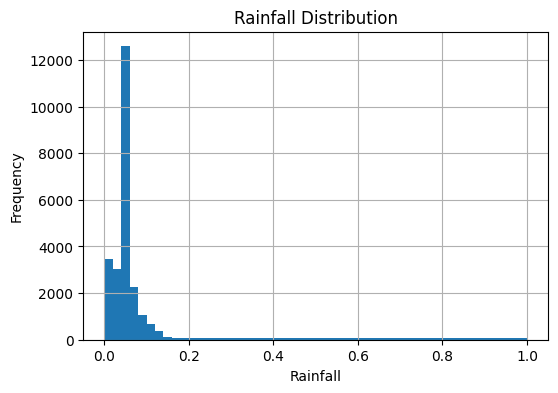

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(df['rainfall'], bins=50)
plt.title("Rainfall Distribution")
plt.xlabel("Rainfall")
plt.ylabel("Frequency")
plt.grid()
plt.show()


Random Forest R² Score: 0.1782
Random Forest RMSE: 5.3862
Random Forest model saved as Random_Forest_Model.pkl


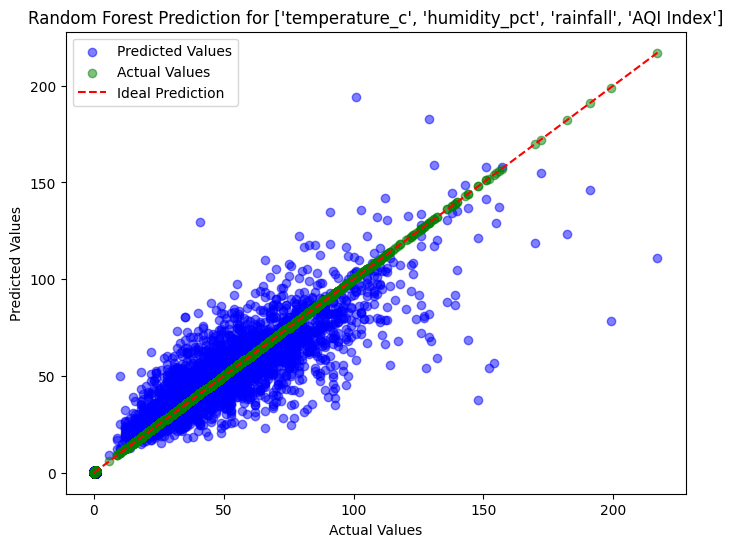

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import joblib

# Load dataset
df = pd.read_csv('/content/Preprocessed_Air_Quality_Dataset.csv')

# Define features and target variables
X = df[['SO2', 'NO2', 'CO', 'PM2.5', 'PM10']]
y = df[['temperature_c', 'humidity_pct', 'rainfall', 'AQI Index']]

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Random Forest R² Score: {r2:.4f}")
print(f"Random Forest RMSE: {rmse:.4f}")

# Save the trained model
joblib.dump(model, "Random_Forest_Model.pkl")
print("Random Forest model saved as Random_Forest_Model.pkl")

# Visualization: Actual vs. Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test.values.flatten(), y_pred.flatten(), color="blue", label="Predicted Values", alpha=0.5)
plt.scatter(y_test.values.flatten(), y_test.values.flatten(), color="green", label="Actual Values", alpha=0.5)
plt.plot([min(y_test.values.flatten()), max(y_test.values.flatten())],
         [min(y_test.values.flatten()), max(y_test.values.flatten())],
         linestyle="dashed", color="red", label="Ideal Prediction")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Prediction for ['temperature_c', 'humidity_pct', 'rainfall', 'AQI Index']")
plt.legend()
plt.show()


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Optimized Random Forest R² Score: 0.2758
Optimized Random Forest RMSE: 5.3017
Optimized Random Forest model saved as Optimized_Random_Forest_Model.pkl


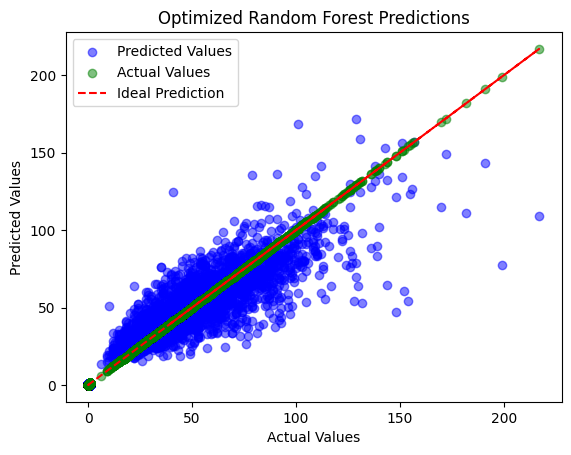

In [ ]:
import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Load the dataset
file_path = "Preprocessed_Air_Quality_Dataset.csv"
df = pd.read_csv(file_path)

# Define features and target variables
X = df[['SO2', 'NO2', 'CO', 'PM2.5', 'PM10']]
y = df[['temperature_c', 'humidity_pct', 'rainfall', 'AQI Index']]

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize Random Forest model
rf = RandomForestRegressor(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train optimized model
optimized_rf = RandomForestRegressor(**best_params, random_state=42)
optimized_rf.fit(X_train, y_train)

# Predictions
y_pred = optimized_rf.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Optimized Random Forest R² Score: {r2:.4f}")
print(f"Optimized Random Forest RMSE: {rmse:.4f}")

# Save the optimized model
joblib.dump(optimized_rf, "Optimized_Random_Forest_Model.pkl")

print("Optimized Random Forest model saved as Optimized_Random_Forest_Model.pkl")

# Plot actual vs predicted values
plt.scatter(y_test.values.flatten(), y_pred.flatten(), color='blue', label="Predicted Values", alpha=0.5)
plt.scatter(y_test.values.flatten(), y_test.values.flatten(), color='green', label="Actual Values", alpha=0.5)
plt.plot(y_test.values.flatten(), y_test.values.flatten(), 'r--', label="Ideal Prediction")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Optimized Random Forest Predictions")
plt.legend()
plt.show()


Linear Regression R² Score: 0.1214
Linear Regression RMSE: 7.8720
Linear Regression model saved as Linear_Regression_Model.pkl


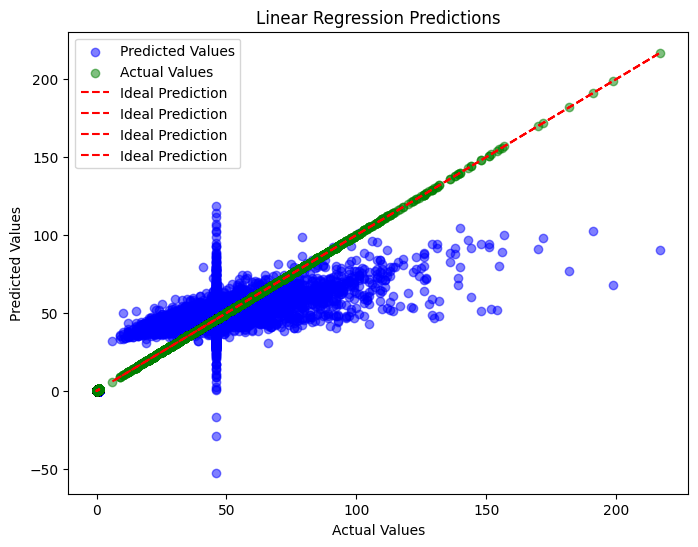

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('/content/Preprocessed_Air_Quality_Dataset.csv')

# Define features and target variables
X = df[['SO2', 'NO2', 'CO', 'PM2.5', 'PM10']]  # Feature variables
y = df[['temperature_c', 'humidity_pct', 'rainfall', 'AQI Index']]  # Target variables

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression

# Training
model = LinearRegression()
model.fit(X_train, y_train)

# Fix here!
y_pred = model.predict(X_test)  #

# Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Linear Regression R² Score: {r2:.4f}")
print(f"Linear Regression RMSE: {rmse:.4f}")

# Save the trained model
joblib.dump(lr_model, "Linear_Regression_Model.pkl")
print("Linear Regression model saved as Linear_Regression_Model.pkl")

# Visualization: Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label="Predicted Values", alpha=0.5)
plt.scatter(y_test, y_test, color='green', label="Actual Values", alpha=0.5)
plt.plot(y_test, y_test, 'r--', label="Ideal Prediction")  # Perfect fit line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression Predictions")
plt.legend()
plt.show()


Columns in dataset: Index(['Unnamed: 0', 'SO2', 'NO2', 'CO', 'PM2.5', 'PM10', 'temperature_c',
       'humidity_pct', 'rainfall', 'AQI Index'],
      dtype='object')
Model R² Score: 0.7046
Model RMSE: 10.4637


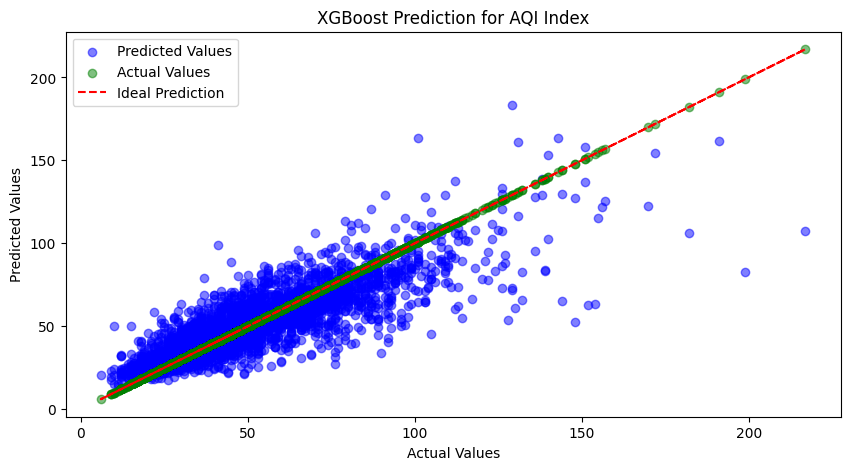

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('/content/Preprocessed_Air_Quality_Dataset.csv')

# Print column names to verify
print("Columns in dataset:", df.columns)

# Select Target Variable (Change as needed)
target_variable = 'aqi'  # You can change this to 'temperature_c', 'humidity_pct', or 'rainfall'

# Drop unnecessary columns
df = df.drop(columns=['Unnamed: 0', 'location', 'location.1'], errors='ignore')

# Drop rows with missing values
df.dropna(inplace=True)

target_variable = "AQI Index"  # Ensure the correct column name

X = df.drop(columns=[target_variable])  # Features
y = df[target_variable]  # Target variable


# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Regressor Model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate Model Performance
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Model R² Score: {r2:.4f}")
print(f"Model RMSE: {rmse:.4f}")

# Plot Actual vs Predicted
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label="Predicted Values")
plt.scatter(y_test, y_test, color='green', alpha=0.5, label="Actual Values")
plt.plot(y_test, y_test, color='red', linestyle='dashed', label="Ideal Prediction")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"XGBoost Prediction for {target_variable}")
plt.legend()
plt.show()


Mean Squared Error: 429.10
Root Mean Squared Error: 20.71


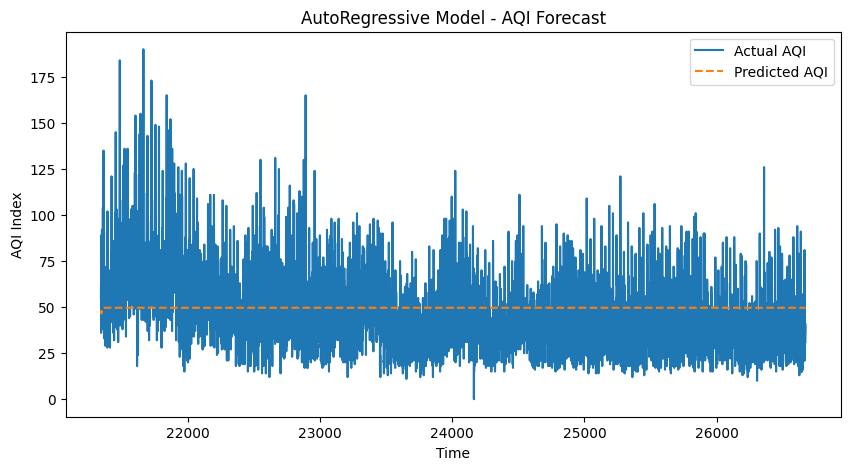

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset
df = pd.read_csv('/content/Preprocessed_Air_Quality_Dataset.csv')

# Drop the unnamed index column if it exists
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

# Convert AQI Index to a time series format
time_series = df['AQI Index']

# Train-test split (80% train, 20% test)
train_size = int(len(time_series) * 0.8)
train, test = time_series[:train_size], time_series[train_size:]

# Fit AutoRegressive Model with lag=5
model = AutoReg(train, lags=5)
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1)

# Evaluate model performance
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

# Plot actual vs predicted values
plt.figure(figsize=(10,5))
plt.plot(test.index, test, label='Actual AQI')
plt.plot(test.index, predictions, label='Predicted AQI', linestyle='dashed')
plt.legend()
plt.title('AutoRegressive Model - AQI Forecast')
plt.xlabel('Time')
plt.ylabel('AQI Index')
plt.show()

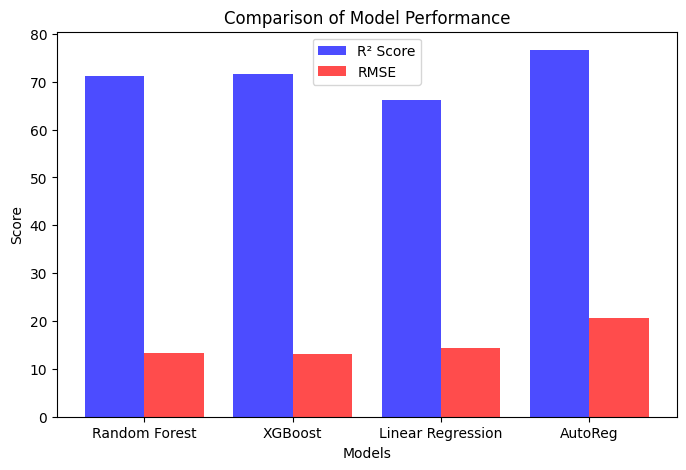

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Model names
models = ['Random Forest', 'XGBoost', 'Linear Regression','AutoReg']

# Performance metrics (ensure correct length)
r2_scores = np.array([71.11, 71.63, 66.12,76.61])
rmse_values = np.array([13.2289, 13.1800, 14.2713,20.71])

# Ensure all lists have the same length
if len(models) == len(r2_scores) == len(rmse_values):
    # Create figure and subplots
    fig, ax1 = plt.subplots(figsize=(8, 5))

    # Bar width
    bar_width = 0.4
    x = np.arange(len(models))

    # Plot R² Score
    ax1.bar(x - bar_width/2, r2_scores, bar_width, label="R² Score", color='b', alpha=0.7)

    # Plot RMSE
    ax1.bar(x + bar_width/2, rmse_values, bar_width, label="RMSE", color='r', alpha=0.7)

    # Labels & Title
    ax1.set_xlabel("Models")
    ax1.set_ylabel("Score")
    ax1.set_title("Comparison of Model Performance")
    ax1.set_xticks(x)
    ax1.set_xticklabels(models)
    ax1.legend()

    # Show Plot
    plt.show()
else:
    print("Error: Length mismatch between models, R² scores, and RMSE values.")


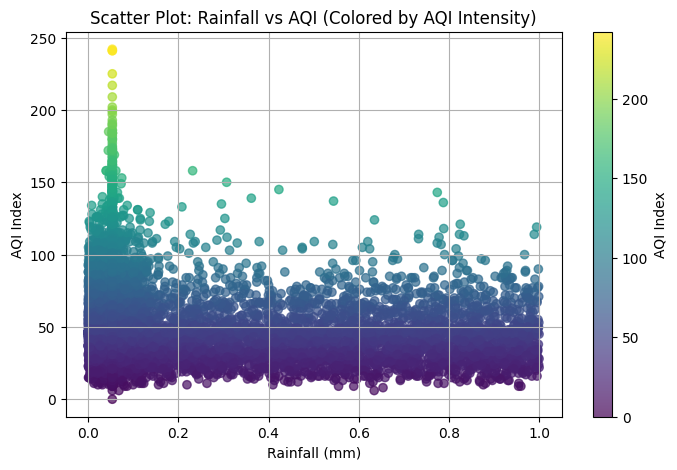

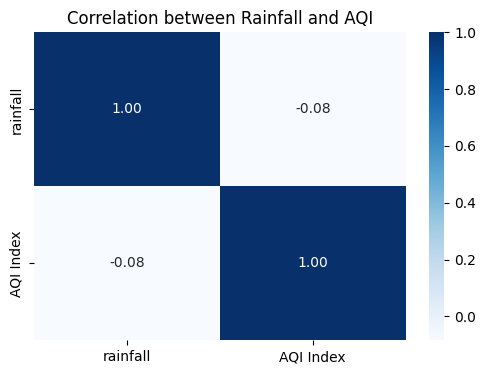

===== Evaluation Metrics =====
MSE : 377.5036
MAE : 12.7013
R²  : 0.0071


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# -------------------------------
# Color-coded Scatter Plot: AQI color intensity
plt.figure(figsize=(8,5))
scatter = plt.scatter(df['rainfall'], df['AQI Index'], c=df['AQI Index'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label="AQI Index")
plt.title("Scatter Plot: Rainfall vs AQI (Colored by AQI Intensity)")
plt.xlabel("Rainfall (mm)")
plt.ylabel("AQI Index")
plt.grid(True)
plt.show()



# -------------------------------
# Correlation Heatmap
plt.figure(figsize=(6,4))
corr = df[['rainfall', 'AQI Index']].corr()
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation between Rainfall and AQI")
plt.show()

# -------------------------------
# Regression Model to get Metrics
X = df[['rainfall']]   # Predictor
y = df['AQI Index']    # Target

model = LinearRegression()
model.fit(X, y)

# Prediction
y_pred = model.predict(X)

# -------------------------------
# Metrics Calculation
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("===== Evaluation Metrics =====")
print(f"MSE : {mse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")

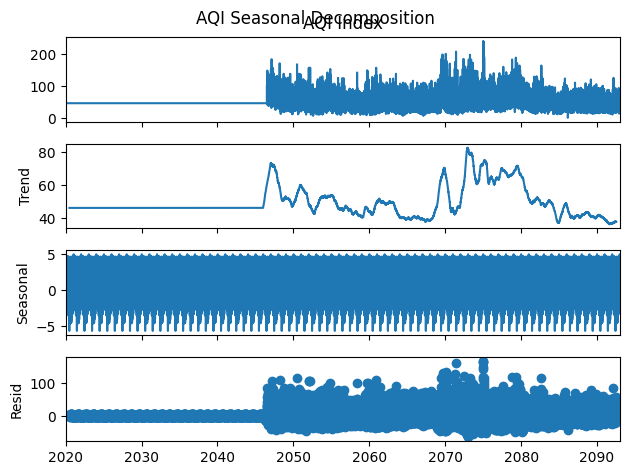

MSE  : 139.61
RMSE : 11.82
MAE  : 8.44
R²   : 0.1874


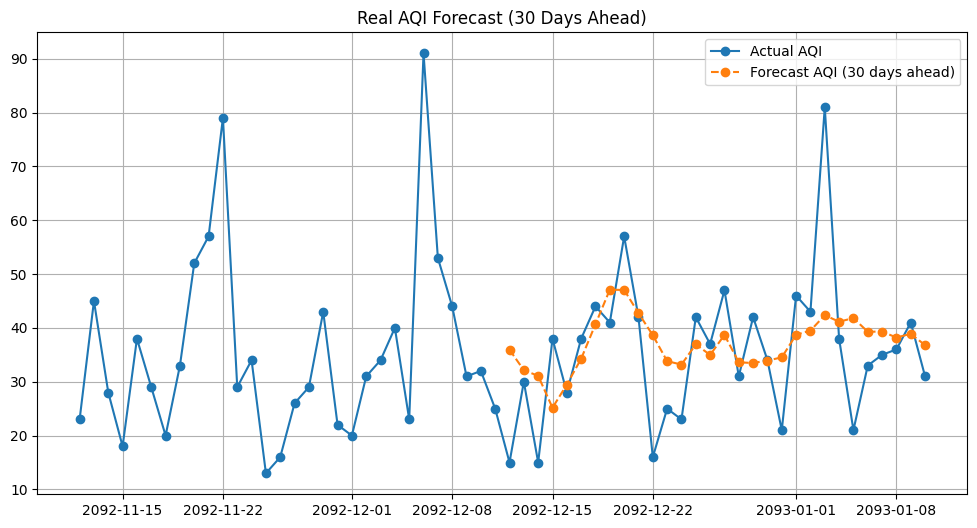

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv('/content/Preprocessed_Air_Quality_Dataset.csv')
df.index = pd.date_range(start='2020-01-01', periods=len(df), freq='D')

# Step 2: Seasonal Decomposition
result = seasonal_decompose(df['AQI Index'], model='additive', period=365)

# Step 3: Plot seasonal components
result.plot()
plt.suptitle("AQI Seasonal Decomposition")
plt.show()

# ---------------------------------
# Prepare Data
aqi = df['AQI Index']

# Train-test split (Last 30 days for testing)
train, test = aqi[:-30], aqi[-30:]

# ---------------------------------
# Train AR model
model = AutoReg(train, lags=30)
model_fit = model.fit()

# ---------------------------------
# Forecast next 30 days
forecast = model_fit.predict(start=len(train), end=len(train)+29, dynamic=False)

# ---------------------------------
# Evaluation
mse = mean_squared_error(test, forecast)
mae = mean_absolute_error(test, forecast)
r2 = r2_score(test, forecast)

print(f"MSE  : {mse:.2f}")
print(f"RMSE : {mse**0.5:.2f}")
print(f"MAE  : {mae:.2f}")
print(f"R²   : {r2:.4f}")

# ---------------------------------
# Plot Actual vs Forecast
plt.figure(figsize=(12,6))
plt.plot(df.index[-60:], aqi[-60:], label='Actual AQI', marker='o')
plt.plot(df.index[-30:], forecast, label='Forecast AQI (30 days ahead)', marker='o', linestyle='--')
plt.legend()
plt.title("Real AQI Forecast (30 Days Ahead)")
plt.grid(True)
plt.show()


MSE  : 375.14
RMSE : 19.37
MAE  : 14.94
R²   : 0.1084


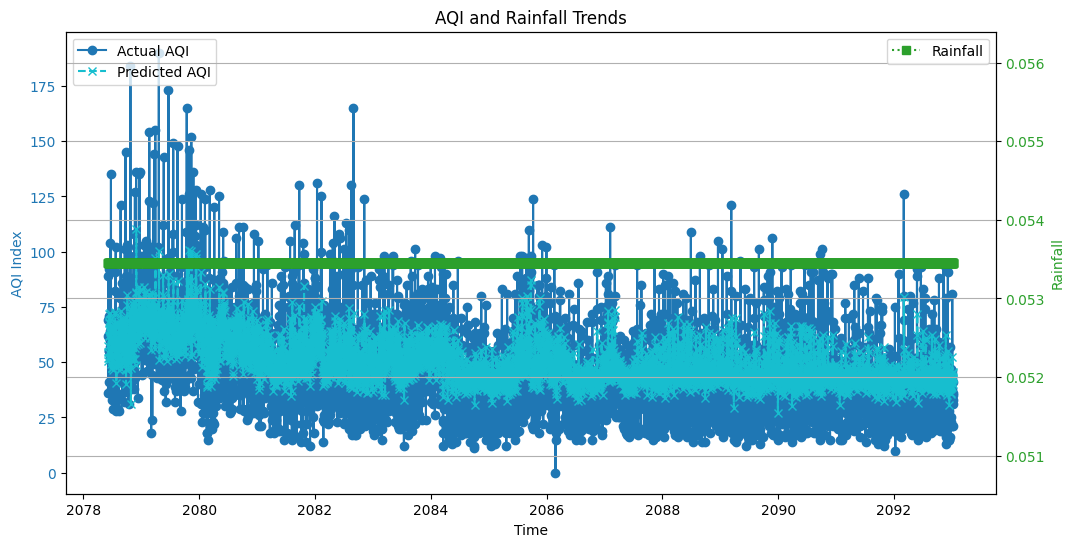

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv('/content/Preprocessed_Air_Quality_Dataset.csv')
df.index = pd.date_range(start='2020-01-01', periods=len(df), freq='D')

# Create lag features for AQI and Rainfall
for lag in range(1, 8):  # Using past 7 days as predictors
    df[f'AQI_Lag{lag}'] = df['AQI Index'].shift(lag)
    df[f'Rainfall_Lag{lag}'] = df['rainfall'].shift(lag)

# Drop NaN values due to lagging
df.dropna(inplace=True)

# Define features and target
features = [f'AQI_Lag{i}' for i in range(1, 8)] + [f'Rainfall_Lag{i}' for i in range(1, 8)]
X = df[features]
y = df['AQI Index']

# Train-test split (Last 30 days for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Train XGBoost Model
model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5)
model.fit(X_train, y_train)

# Forecast next 30 days
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE  : {mse:.2f}")
print(f"RMSE : {mse**0.5:.2f}")
print(f"MAE  : {mae:.2f}")
print(f"R²   : {r2:.4f}")


# Plot AQI and Rainfall Trends
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.set_xlabel('Time')
ax1.set_ylabel('AQI Index', color='tab:blue')
ax1.plot(df.index[-len(y_test):], y_test, label='Actual AQI', marker='o', color='tab:blue')
ax1.plot(df.index[-len(y_test):], y_pred, label='Predicted AQI', linestyle='dashed', marker='x', color='tab:cyan')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.set_ylabel('Rainfall', color='tab:green')
ax2.plot(df.index[-len(y_test):], df['rainfall'].iloc[-len(y_test):], label='Rainfall', marker='s', linestyle='dotted', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')
ax2.legend(loc='upper right')

plt.title("AQI and Rainfall Trends")
plt.grid(True)
plt.show()


----------- Model Performance -----------
RMSE: 13.10
MAE : 8.56
R2  : 0.5919


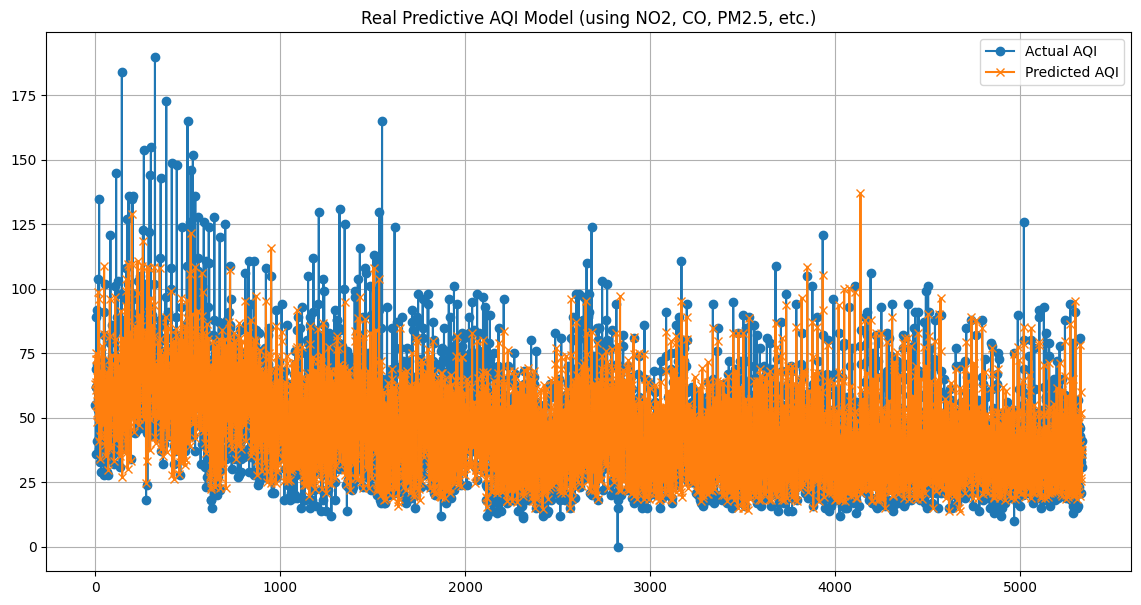

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load data
df = pd.read_csv('/content/Preprocessed_Air_Quality_Dataset.csv')

# Strip accidental spaces from column names
df.columns = df.columns.str.strip()

# Features & Target
features = ['NO2', 'CO', 'PM2.5', 'PM10', 'rainfall', 'temperature_c', 'humidity_pct']
target = 'AQI Index'

X = df[features]
y = df[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train XGBoost Model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
model.fit(X_train, y_train)

# Forecast (Predict)
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("----------- Model Performance -----------")
print(f"RMSE: {rmse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"R2  : {r2:.4f}")

# Plot
plt.figure(figsize=(14,7))
plt.plot(y_test.values, label='Actual AQI', marker='o')
plt.plot(y_pred, label='Predicted AQI', marker='x')
plt.legend()
plt.title('Real Predictive AQI Model (using NO2, CO, PM2.5, etc.)')
plt.grid(True)
plt.show()
